<a href="https://colab.research.google.com/github/ak0982/AI-assignment/blob/master/ASSIGNMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  NAME --> AMAR KUMAR
#  ROLL NO --> 1801016
# ASSIGNMENT 3

# Simple Linear Regression (One feature)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
%matplotlib inline

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving slr06.xls to slr06.xls


*** No CODEPAGE record, no encoding_override: will use 'ascii'


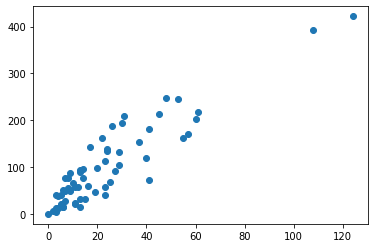

In [ ]:
data=pd.read_excel('slr06.xls')

X=data['X']
Y=data['Y']
plt.scatter(X,Y)


**

```
# This is formatted as code
```

**SPLITTING OF DATA INTO 60% 20% 20%**

In [ ]:
train, validate = train_test_split(data, test_size=0.2,random_state=1)
train,test=train_test_split( train, test_size=0.25)
print(train.shape)
print(validate.shape)
print(test.shape)

(37, 2)
(13, 2)
(13, 2)


**caluclate slope and y intercept OF OLS**


slope is 3.3487666365514754
constant is 24.00832779130174


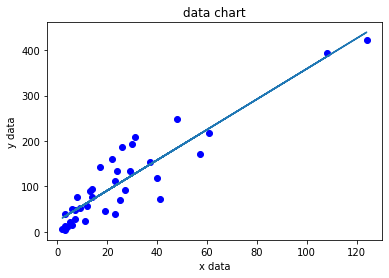

In [ ]:
#calcute slope and y intercept
mean_train_x=np.mean(train['X'].to_numpy())
mean_train_y=np.mean(train['Y'].to_numpy())
#print('mean of train  data X is {}'.format(mean_train_x))
#print('mean of train data Y is {}'.format(mean_train_y))
train_x=train['X'].to_numpy()
train_y=train['Y'].to_numpy()
num=0
dem=0
for i in range(len(train['X'])):
  num +=(train_x[i]-mean_train_x)*(train_y[i]-mean_train_y)
  dem +=(train_x[i]-mean_train_x)**2

slope=num/dem
print('slope is '+str(slope))
const=mean_train_y-(mean_train_x*slope)
print('constant is '+str(const))
#Ploting line with m and c
plt.plot(train['X'],slope*train['X']+const)
plt.scatter(train['X'],train['Y'],color='blue')
plt.title('data chart')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

In [ ]:
def MAE(data):
  predict_output=slope*data['X']+const
  data_y=data['Y']
  data_mae=0
  for i in data.index:
    data_mae +=abs(data_y[i]-predict_output[i])

  data_mae /=len(data)
  return data_mae
  #print('MAE of train is '+str(data_mae))


In [ ]:
print('MAE OF TRAIN IS {}'.format(MAE(train)))
print('MAE OF VALIDATE IS {}'.format(MAE(validate)))
print('MAE OF TEST IS {}'.format(MAE(test)))


MAE OF TRAIN IS 31.136078213129178
MAE OF VALIDATE IS 25.129754081798776
MAE OF TEST IS 24.807854385975073


**CALCULTE SLOPE AND INTERCEPT OF Gradient Descent Algorithm**

In [ ]:
n = len(train['X'])
rate, iters = 0.0001, 10000
slope_g, const_g = 0, 0
for i in range(iters) :

  Y_pred = slope_g* train['X'] + const_g
  d_dm = (-2 / n) * (sum(train['X'] * (train['Y'] - Y_pred)))
  d_dc = (-2 / n) * (sum(train['Y'] - Y_pred))
  slope_g -= rate * d_dm
  const_g -= rate * d_dc

print('SLOPE IS {}'.format(slope_g))
print('INTERCEPT IS {}'.format(const_g))


SLOPE IS 3.5087053151692786
INTERCEPT IS 15.550185223725679


In [ ]:
def MAE_G(data):
  predict_output=slope_g*data['X']+const_g
  data_y=data['Y']
  data_mae=0
  for i in data.index:
    data_mae +=abs(data_y[i]-predict_output[i])

  data_mae /=len(data)
  return data_mae

In [ ]:
print('MAE OF TRAIN IS {}'.format(MAE_G(train)))
print('MAE OF VALIDATE IS {}'.format(MAE_G(validate)))
print('MAE OF TEST IS {}'.format(MAE_G(test)))

MAE OF TRAIN IS 31.389998394701216
MAE OF VALIDATE IS 23.633994185103326
MAE OF TEST IS 25.964294671833503


# Multiple Linear Regression

***Loading...***

In [ ]:
boston= load_boston()
boston_data=pd.DataFrame(boston.data,columns=boston.feature_names)
print(boston_data)
Y_boston = boston.target
X_boston = boston.data

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


**SPLITTING OF DATA INTO 60% 20% 20%**

In [ ]:
X_train_boston, X_test_boston,Y_train_boston, Y_test_boston = train_test_split(X_boston,Y_boston, test_size=0.2, random_state=1)
X_train_boston, X_val_boston,Y_train_boston, Y_val_boston = train_test_split( X_train_boston,Y_train_boston, test_size=0.2, random_state=1)
print(X_train_boston.shape)
print(X_test_boston.shape)
print(X_val_boston.shape)


(323, 13)
(102, 13)
(81, 13)


**Standardising Data**

In [ ]:

scaler = StandardScaler()
x_train_boston = scaler.fit_transform(X_train_boston)
x_val_boston = scaler.fit_transform(X_val_boston)
x_test_boston = scaler.fit_transform(X_test_boston)

train_data_boston = pd.DataFrame(x_train_boston)
train_data_boston['price'] = Y_train_boston
print(train_data_boston.shape)

validate_data_boston = pd.DataFrame(x_val_boston)
validate_data_boston['price'] = Y_val_boston
print(validate_data_boston.shape)

test_data_boston = pd.DataFrame(x_test_boston)
test_data_boston['price'] = Y_test_boston
print(test_data_boston.shape)

(323, 14)
(81, 14)
(102, 14)


**Multiple Linear Regression Gradient Descent Algorithm**

In [ ]:
# Multiple Linear Regression Gradient Descent Algorithm
def MLR_GDA(data, learning_rate, iters, sample_size) :
  w = np.zeros(shape = (1, data.shape[1] - 1))
  b = 0
  for iter in range(iters) :
    sample_data = data.sample(sample_size)
    y = np.array(sample_data['price'])
    x = np.array(sample_data.drop('price', axis = 1))
    w_g = np.zeros(shape = (1, data.shape[1] - 1))
    b_g = 0

    for i in range(sample_size) :
      y_pred = np.dot(w, x[i]) + b
      w_g += (-2) * (x[i]) * (y[i] - y_pred)
      b_g += (-2) * (y[i] - y_pred)
    w -= (learning_rate) * (w_g / sample_size)
    b -= (learning_rate) * (b_g / sample_size)
  return w, b

**Function of Mean Absolute Error**

In [ ]:
def MAE_MLR(w, b, X, Y) :
  mae, n = 0, len(X)
  for i in range(n):
    y_pred = np.dot(w, X[i]) + b
    mae += abs(Y[i] - y_pred)
  mae = mae/n
  return mae
weight, bias = MLR_GDA(train_data_boston, 0.001, 1000, 10)
print('WEIGHT IS \n{} and \n bias is\n{}'.format(weight,bias))

WEIGHT IS 
[[-0.71215578  0.36318117 -0.4446543   0.7549131  -0.73560734  2.53663675
  -0.46191317 -1.13685351  0.37590099 -0.14005246 -1.7274276   0.53588055
  -2.93285097]] and 
 bias is
[19.6484998]


**MAE VALUE OF TRAIN , VALIDATE,TEST**

In [ ]:

y = np.array(train_data_boston['price'])
x = np.array(train_data_boston.drop('price', axis = 1))
print("MAE OF TRAIN IS : {}" .format(MAE_MLR(weight, bias, x, y)))
y = np.array(validate_data_boston['price'])
x = np.array(validate_data_boston.drop('price', axis = 1))
print("MAE OF VALIDATE IS : {}" .format(MAE_MLR(weight, bias, x, y)))
y = np.array(test_data_boston['price'])
x = np.array(test_data_boston.drop('price', axis = 1))
print("MAE OF TEST IS : {}" .format(MAE_MLR(weight, bias, x, y)))

MAE OF TRAIN IS : [3.86649198]
MAE OF VALIDATE IS : [3.27503275]
MAE OF TEST IS : [3.98653293]
